

# Project 2: Line Strengths and Curve of Growth ("Marcel Minnaert")

EN LITEN INTRO

How exactly does spectral lines form? This is a question.. bla bal ..

In [1]:
# General imports needed for this project:

%matplotlib inline
import numpy
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
quantity_support()
set_matplotlib_formats('svg')
plt.rc('legend', frameon=False)

NameError: name 'quantity_support' is not defined

(It would be nice if you could provide a short introduction to the code, and why you are writing it here.)

# Exercise 1:
The Planck function specifies the radiation intensity emitted by a gas or a body in thermodynamic equilibrium as
 
\begin{equation} 
   B_\lambda(T) = \frac{2hc^2}{\lambda^5} 
                  \frac{1}{\mathrm{e}^{hc/\lambda kT}-1}
  \label{eq:1.1}
\end{equation}

We want to plot \eqref{eq:1.1} for 100 < $\lambda$ < 2000 nm for a range of temperatures (5000 to 8000 K), in order to observe how the intensities corresponding to these different given temperatures develop at different wavelengths. This can be done by using a BlackBody model from astropy and importing a variation of imports from astropy, making it easier when converting between units.

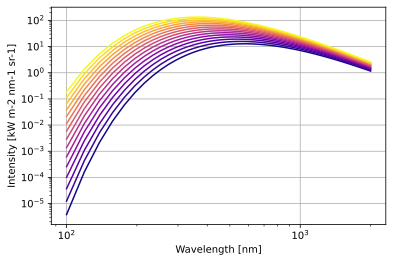

In [134]:
from astropy import units
from astropy import constants
from astropy.visualization import quantity_support
from astropy.modeling.models import BlackBody
from matplotlib import cm
from cycler import cycler

temp = units.Quantity([5000,8000], unit='K')
bb = BlackBody(temp)

# Gives Plack function as a func of lambda(wavelength):
i_units = 'W m-2 nm-1 sr-1'
bb_lambda = BlackBody(temp, scale=1. * units.Unit(i_units))

bb_lambda(wave[:, numpy.newaxis])
wave = numpy.linspace(100,2000,100) * units.nm
temp = numpy.linspace(5000,8000,15) * units.K

radiation = BlackBody(temp, scale=1.*units.Unit(i_units))(wave[:,numpy.newaxis])

fig, ax = plt.subplots()
custom_cycler = cycler('color', cm.plasma(numpy.linspace(0,1,len(temp))))
ax.set_prop_cycle(custom_cycler)
ax.plot(wave, radiation.to('kW m-2 nm-1 sr-1'))
plt.ylabel("Intensity [kW m-2 nm-1 sr-1]")
plt.xlabel("Wavelength [nm]") #$\\lambda$
plt.xscale("log")
plt.yscale("log")
plt.grid()


In the plot presented above, we see the Plack function, $B_{\lambda}$ for 100 < $\lambda$ < 2000 nm, as a function of wavelength $\lambda$ (5000 to 8000 K). We observe that the slopes for the different intensities corresponding to 15 different tempertures will approach eachother on the right hand part. The reason for this is that Planck's law at long wavelengths becomes the Rayleigh-Jeans law [kilde ????, https://en.wikipedia.org/wiki/Planck%27s_law#Approximations],

\begin{equation*}
B_{\lambda}(T) \approx \frac{2 c}{\lambda^4} k_B T, \\
\end{equation*}


which means that,

\begin{equation*}
B_{\lambda} \ \propto \ \frac{1}{\lambda^4}. \\
\end{equation*}


And since we have a log plot, looking at log(1/$\lambda^4$), we can obatin

\begin{equation*}
\text{log} \Big( \frac{1}{\lambda^4} \Big) = \text{log}(1) - \text{log}(\lambda^4) = -4 \text{log}(\lambda),\\
\end{equation*}


which indicates that the intensitites decreases linearly like -4$\lambda$ in this plot.




Next, we want to calculate the radiation through an isothermal layer, by use of the equation


\begin{equation}
   I_\lambda = I_\lambda(0) \mathrm{e}^{-\tau} 
        + B_\lambda \, \left( 1 - \mathrm{e}^{-\tau} \right).
    \label{eq:1.2}
\end{equation}

This we want to do in order to create plots of $I_{\lambda}$ for the different values of $I_\lambda(0)$, so that we can investigate how the intensities evolves when the optical path increases. 

When performing the calculations, we will be using some chosen values presented below,

``` python
b_lambda = 2
tau = numpy.logspace(-2, 1, 100)
i0 = numpy.arange(5)
```


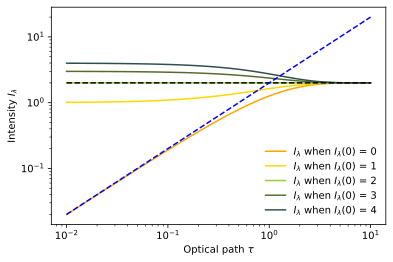

In [138]:
b_lambda = 2
tau = numpy.logspace(-2, 1, 100)
i0 = np.arange(5)

def I_lambda(tau,b_lambda,I0):
    return_I = (I0 * numpy.exp(-tau)) + b_lambda*(1-numpy.exp(-tau))
    return return_I
 
plt.plot(tau,I_lambda(tau,b_lambda,I0=i0[0]), "orange", label="$I_{\lambda}$ when $I_{\lambda}(0)$ = 0")
plt.plot(tau,I_lambda(tau,b_lambda,I0=i0[1]), "gold", label="$I_{\lambda}$ when $I_{\lambda}(0)$ = 1")
plt.plot(tau,I_lambda(tau,b_lambda,I0=i0[2]), "yellowgreen", label="$I_{\lambda}$ when $I_{\lambda}(0)$ = 2")
plt.plot(tau,I_lambda(tau,b_lambda,I0=i0[3]), "darkolivegreen", label="$I_{\lambda}$ when $I_{\lambda}(0)$ = 3")
plt.plot(tau,I_lambda(tau,b_lambda,I0=i0[4]), "darkslategrey", label="$I_{\lambda}$ when $I_{\lambda}(0)$ = 4")
plt.ylabel("Intensity $I_{\\lambda}$")
plt.xlabel("Optical path $\\tau$")
plt.plot(tau, numpy.ones(100)*b_lambda, "k--")
plt.plot(tau, tau*b_lambda, "b--")
plt.legend()
plt.loglog()
plt.show()


The plot above presents the intensity as a function of optical path. 
When the optical path is small, the intensity corresponding to when $I(0)=0$ goes as $B_{\lambda} \tau$, which is represented by the blue dashed line. When looking at Eq \eqref{eq:1.2} for $\tau \ll 1$ when $I(0)=0$ we get, 

\begin{equation}
I_{\lambda} = B_{\lambda}(1-e^{- \tau}),
\end{equation}

and then we Taylor expand $e^{- \tau}$ at $\tau = 0$ and get

\begin{equation}
(1-e^{- \tau}) \approx e^0 - e^{- \tau} \tau = e^0 - \tau = 1 - \tau.
\end{equation}

When inserting this back into the original expression, we obtain

\begin{equation}
I_{\lambda} = B_{\lambda}(1 - (1 - \tau)) = B_{\lambda} \tau.
\end{equation}


When $I(0)=2$ the intensity is constant at 2, and we can see the reason why by again looking at Eq \eqref{eq:1.2}, and observing that the expression becomes

\begin{equation}
I_{\lambda} = 2 e^{-\tau} + 2(1-e^{- \tau}) = 2,
\end{equation}

when inserting $I(0)=2$ and $B_{\lambda} = 2$. 

Next, we look at when $I_\lambda(0) > B_\lambda$ and oberve from the plot that for $\tau \ll 1$ the intensity will be greater than when $I_\lambda(0) \leq B_\lambda$. The top two dark green lines represents this situation.

A layer when $\tau \ll 1$ is called "optically thin", becuase the medium becomes very transparent. A photon can pass trough this medium witout absorbtion, and an example of such an optically thin medium can be glas or water as opposed to a wooden table, which is a layer called "optically thick". This is when $\tau \gg 1$, and photons can no longer travel trough without absorption. 

In the plot, we observe that after $\tau \approx 10^{-1}$ all the intensities approach eachother at $I_{\lambda} = 2$. The reason for this can also be found by looking at Eq \eqref{eq:1.2}. We see that the exponentials goes to zero when $\tau \gg 1$, and the expression becomes 

\begin{equation}
I_{\lambda} = B_{\lambda} = 2.
\end{equation}

If we look at this in physical terms, it means that when $\tau$ becomes very large, the intensity becomes independent of $\tau$, and the medium becomes so opaque that all the light that is emmited, on the other side of the medium relative to the light source, is the light emmtied from the object itself.
